In [517]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [518]:
import pandas as pd
import numpy as np
import os
import math
from numpy import exp
import seaborn as sns
import matplotlib.pyplot as plt

In [519]:
House_data = pd.read_csv('energydata_complete.csv', sep=',')

In [ ]:
def plot_corr(df,size=20):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
plot_corr(House_data)    

In [438]:
House_data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [520]:
# Analyzing data, Taking a small dataset, Dropping date, leaving Appliance enery usage for Y column
# We can use the same x for regression and classification. 
House_data.head(3)
x = House_data.iloc[:,2:]
#x = House_data.iloc[:,19:]
y = House_data.iloc[:,1]
y_log = (y>50)*1
x.shape
y.shape
y_log.shape


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


(19735, 27)

(19735,)

(19735,)

In [521]:
# Split train and test
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4, random_state=100)
x_train.shape
x_test.shape

# Splitting for classification as well. 
x_train_log,x_test_log,y_train_log,y_test_log = train_test_split(x,y_log,test_size = 0.4, random_state=100)
x_train_log.shape
x_test_log.shape

(11841, 27)

(7894, 27)

(11841, 27)

(7894, 27)

In [522]:
# Creating Theta matrix, initializing random values,  adding a column for the bias terms

np.random.seed(0)
thetas_matrix = np.random.rand(x_train.shape[1]+1,1)
thetas_matrix.shape


(28, 1)

In [ ]:
thetas_matrix

In [523]:
# Changing DS from Pandas series to numpy arrays
x_train_numpy = np.array(x_train)
x_test_numpy = np.array(x_test)
y_train_numpy = np.array(y_train)
y_test_numpy = np.array(y_test)

x_train_log = np.array(x_train_log)
x_test_log = np.array(x_test_log)
y_train_log = np.array(y_train_log)
y_test_log = np.array(y_test_log)

x_train_numpy.shape
y_train_numpy.shape
x_test_numpy.shape
y_test_numpy.shape
y_test_log.shape
y_train_log.shape

# Here we observe that we need to reshape the y arrays.

# Reshaping Y variables to be M x 1 where our data matrix is of shape M x n 
y_train_numpy = y_train_numpy.reshape(x_train_numpy.shape[0], 1)
y_test_numpy  = y_test_numpy.reshape(x_test_numpy.shape[0],1)

y_train_log  = y_train_log.reshape(x_train_log.shape[0], 1)
y_test_log = y_test_log.reshape(x_test_log.shape[0], 1)

(11841, 27)

(11841,)

(7894, 27)

(7894,)

(7894,)

(11841,)

In [524]:
# Normalization/Standardization 
# Normalizing the features using standard deviation
# 
x_train_numpy = (x_train_numpy - np.mean(x_train_numpy))/np.std(x_train_numpy)
x_test_numpy = (x_test_numpy - np.mean(x_test_numpy))/np.std(x_test_numpy)


x_train_log = (x_train_log - np.mean(x_train_log))/np.std(x_train_log)
x_test_log = (x_test_log - np.mean(x_test_log))/np.std(x_test_log)

In [525]:
# Appending ones to training data & Test data for the bias term
x_train_numpy = np.insert(x_train_numpy,0,1,axis=1)
x_train_numpy.shape

x_test_numpy = np.insert(x_test_numpy,0,1,axis=1)
x_test_numpy.shape

# Appending ones to training data & Test data for the bias term for the classification x matrix 
x_train_log = np.insert(x_train_log,0,1,axis=1)
x_train_log.shape
x_test_log = np.insert(x_test_log,0,1,axis=1)
x_train_log.shape


(11841, 28)

(7894, 28)

(11841, 28)

(11841, 28)

In [10]:
# Here I try to combine the two regression functions
# Make a general runner/wrapper function that takes the data set input 
# Activation = sigmoid or 1 we will use for logistic and the other can be used for regression. 

In [526]:
# Wrapper function is simply a caller function for gradient descent.
# Activation parameter differentiates between linear and logistic regression 
# Activation = 1 for logistic regression
# Activation = 0 for linear regression 
# convergence_threshold constant is different for both linear and logistic regression. 
def wrapper_function(activation,alpha,maximum_iterations,data_matrix,y_matrix,theta_matrix,x_test_matrix,y_test_matrix,convergence_threshold):
        
        optimum_thetas,Cost_history,gradient_diff_sum_array,test_cost_history= gradient_descent(activation,alpha,data_matrix,theta_matrix,y_matrix,maximum_iterations,x_test_matrix,y_test_matrix,convergence_threshold)
        return optimum_thetas,Cost_history,gradient_diff_sum_array,test_cost_history


In [527]:
# One general purpose gradient descent, both regression and classification tasks use same gradient descent function. 
# Algorithms are differentiated based on activation. 

def gradient_descent(activation,alpha,data_matrix,theta_matrix,y_matrix,maximum_iterations,x_test_matrix,y_test_matrix,convergence_threshold):
    
    cost_history_array = np.zeros(maximum_iterations) # for each iteration, keep a cost for plotting
    test_cost_history = np.empty(maximum_iterations) # for saving test error
    
    optimum_thetas = theta_matrix
    updated_thetas = theta_matrix
    gradient_diff_sum_array = np.zeros(maximum_iterations)
    convergence_iteration_number = 0 
    #convergence = False
    for i in range(maximum_iterations):

        print('Epoch : ',i)
        old_cost = cost_function(activation,data_matrix,updated_thetas,y_matrix)
        print('Cost :',old_cost)
        cost_history_array[i] = old_cost
        # Following array will save the test error for each epoch updated thetas. 
        test_cost_history[i] = cost_function(activation,x_test_matrix,updated_thetas,y_test_matrix)
        
        gradient = gradient_calculator(activation,data_matrix,updated_thetas,y_matrix,alpha)
        # Checking, for debuggin only 
        #gradient_difference = check_gradient(activation,gradient,updated_thetas,data_matrix,y_matrix)
        #gradient_diff_sum_array[i] = np.sum(gradient_difference)
        
        old_thetas = updated_thetas
        updated_thetas = gradient_updater(gradient,updated_thetas,alpha)
        
        # Calling convergence check function 
        convergence = convergence_check(activation,updated_thetas,old_thetas,data_matrix,y_matrix,convergence_threshold)
        if(convergence):
            #print('convergence has occured, killing the loop')
            optimum_thetas = old_thetas
            convergence_iteration_number = i
            break

        
        if(i == maximum_iterations-1):
            #print('Try more Epochs for saturation, Did not converge')
            optimum_thetas = updated_thetas

        # Calling gradient checker function
        #gradient_approximation,grad_difference = gradient_checker(gradient,updated_thetas,data_matrix,y_matrix)

            
        #print('-------------------------------------------------------------------------------------------------------')
    return optimum_thetas,cost_history_array,gradient_diff_sum_array,test_cost_history

In [528]:
# Function for returning predicted values given a data matrix and thetas
def predicted_value(data_matrix,thetas):
    return np.dot(data_matrix,thetas)

In [529]:
# Sigmoid function required for logistic regression 
def sigmoid_function(z):
    return 1 / (1 + exp(-z))

In [530]:
# Caller for sigmoid function. 
def H_function(data_matrix,thetas):
    H = sigmoid_function(predicted_value(data_matrix,thetas)) # here the sigmoid is fed z value
    return H

In [531]:
# calculate gradient to be subtracted from weights
# Works for linear and logistic regression differenlty based on activation function 
def gradient_calculator(activation,data_matrix,thetas,y_matrix,alpha):
    
    Xtheta = predicted_value(data_matrix,thetas) 
    data_matrix_T = np.transpose(data_matrix)
    m = data_matrix.shape[0]
    
    if(activation == 0):
        gradient = (np.dot(data_matrix_T,(Xtheta-y_matrix)))
        return gradient/m
    
    elif(activation == 1):
        h = H_function(data_matrix,thetas)
        gradient = np.dot(data_matrix_T,(h- y_matrix))
        return gradient/m

In [457]:
# takes weights, and subtracts the result of gradient calculator 
def gradient_updater(gradient,updated_thetas,alpha):
    return updated_thetas-(gradient*alpha)

In [497]:
# checks if convergence has been achieved or not, we stop training epochs if true. 
def convergence_check(activation,updated_thetas,old_thetas,data_matrix,y_matrix,convergence_threshold):
    if(activation==0):
        old_cost = cost_function(activation,data_matrix,old_thetas,y_matrix)
        updated_cost = cost_function(activation,data_matrix,updated_thetas,y_matrix)
        if(old_cost-updated_cost< convergence_threshold):
            print('Linear Regression Cost has converged,returning thetas in the 2nd last iteration')
            return True
    if(activation==1):
        old_cost = cost_function(activation,data_matrix,old_thetas,y_matrix)
        updated_cost = cost_function(activation,data_matrix,updated_thetas,y_matrix)
        
        if(old_cost-updated_cost< convergence_threshold):
            print('logistic regression Cost has converged,returning thetas in the 2nd last iteration')
            return True
        

In [498]:
# Returns cost for both linear and logistic regression . 
def cost_function(activation,data_matrix,thetas,y_matrix):
    m = data_matrix.shape[0]
    if(activation ==0):
        predicted = predicted_value(data_matrix,thetas)
        cost = np.dot(np.transpose(predicted - y_matrix),(predicted - y_matrix))
        cost = cost/(2*m)
        return cost
    elif(activation ==1):
        h = H_function(data_matrix,thetas)
        log_h = np.log(h)
        log_1_h = np.log(1-h)
        one_min_y_T = np.transpose((1-y_matrix))
        y_T = np.transpose(y_matrix)
        cost = np.dot((-1*y_T),log_h) - np.dot(one_min_y_T,log_1_h)
        return cost/m
        

In [499]:
# This function uses a gradient testing strategy and checks the calculated gradients. 
def check_gradient(activation,gradients,thetas,data_matrix,y_values):
    # initializing empty array
    print('check_gradient called')
    Estimated_gradient = np.zeros((thetas.shape[0], 1))
    gradient_difference = np.zeros((thetas.shape[0], 1))
    
    # PSEUDO CODE
    # Thetas are a vector i.e of order n x 1
    # for every theta we have a gradient 
    # gradients are of order n x 1 as well i.e. for each theta
    # We can estimate gradient for each theta that is why we have a loop
    # at each i we are basically estimating ith theta, how ?
    
    # so epsilon vector is n x 1 as well. 
    # when its ith iteration we add 1 to the ith location 
    # we than multiply that epsilon vector with a constant called epsilon constant
    # so at ith iteration we will only have that index having epsilon constant. 
    # so lets say at 5th iteration, we have epsilon vector having epsilon constant at 5th iteration. 
    # we add that to our theta vector so that  only 5th iteration theta changes. 
    # We than compute the estimated derivative 
    # than we can compare it with the gradients computed by gradient descent 
    
    for i in range(thetas.shape[0]):
        epsilon_constant = 0.0001
        epsilon_vector = np.zeros((thetas.shape[0], 1))
        epsilon_vector[i,0] = 1
        theta_iPlus = thetas + np.dot(epsilon_vector,epsilon_constant)
        theta_iMinus = thetas - np.dot(epsilon_vector,epsilon_constant)
        
        Estimated_gradient = cost_function(activation,data_matrix,theta_iPlus,y_values)- cost_function(activation,data_matrix,theta_iMinus,y_values)
        Estimated_gradient = Estimated_gradient/(2*epsilon_constant)
        
        # so our Estimated_gradient is basically a gradient estimate for the ith theta
        #print('Estimated_gradient for  iteration ',i,Estimated_gradient)
        #print('Actual gradient' ,gradients[i])
        
        # So idea is to have the difference for the ith theta estimate and actual value
        gradient_difference[i] = Estimated_gradient - gradients[i,0]
   
        
    return gradient_difference
        
        
        
        
        
    

In [532]:
# Use activation = 1 for sigmoid
# Use activation = 0 for linear regression
# Experimenting for logistic regression 
activation = 1
alpha = 0.3
maximum_iterations = 25029
data_matrix = x_train_numpy
y_matrix = y_train_log
theta_matrix = thetas_matrix
x_test_matrix = x_test_numpy
y_test_matrix = y_test_log
convergence_threshold = 0.000001

In [ ]:
optimum_thetas,Cost_history,gradient_diff_sum_array,test_cost_history= wrapper_function(activation,alpha,maximum_iterations,data_matrix,y_matrix,thetas_matrix,x_test_matrix,y_test_matrix,convergence_threshold)


In [464]:
cost_function(1,x_test_numpy,optimum_thetas,y_test_log)

array([[0.62829592]])

In [ ]:

plt.xlabel('Iterations')
plt.ylabel('Error')
plt.plot(Cost_history, color = 'red')
plt.plot(test_cost_history)


In [534]:
# So for each iteration, we have gradients calculated for each theta
# We send those thetas to gradient checker which has estimated gradients
# Gradient checker sends the difference for each gradient back to gradient descent function
# Gradient descent saves the difference of estimated thetas by checker and the calculated thetas by the calculator 
# it saves the difference for each iteration in array
# The check is that this difference sum should be very small if our calculation is correct and estimation is close to it
# hence the difference is less. 

# this will work only if the gradient check function is called from gradient descent. 
gradient_diff_sum_array

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
    # Remember always use a smaller threshold for logistic regression 
    # 0.000001
    # Activation 0 means linear regression 
    activation = 0
    alpha = 0.01
    maximum_iterations = 76910
    data_matrix = x_train_numpy
    y_matrix = y_train_numpy
    theta_matrix = thetas_matrix
    x_test_matrix = x_test_numpy
    y_test_matrix = y_test_numpy
    convergence_threshold = 0.001
    
    
    
    optimum_thetas,Cost_history,gradient_diff_sum_array,test_cost_history= wrapper_function(activation,alpha,maximum_iterations,data_matrix,y_matrix,thetas_matrix,x_test_matrix,y_test_matrix,convergence_threshold)


In [ ]:
optimum_thetas


In [466]:
optimum_thetas.shape
cost_function(0,data_matrix,optimum_thetas,y_matrix)
cost_function(0,x_test_numpy,optimum_thetas,y_test_numpy)

(11, 1)

array([[5017.81008849]])

array([[5346.7823376]])

(11841, 1)

Text(0.5, 0, 'Appliance Energy consumption')

Text(0, 0.5, 'Residuals')

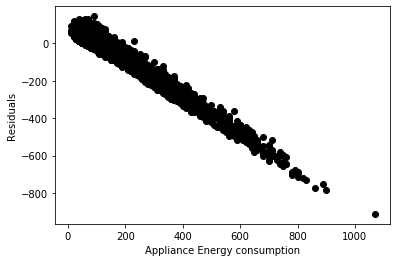

In [516]:
y_train_numpy.shape
residual = predicted_value(x_train_numpy,optimum_thetas) - y_train_numpy


plt.xlabel('Appliance Energy consumption')
plt.ylabel('Residuals')

plt.scatter(y_train_numpy,residual,color = 'black')



Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

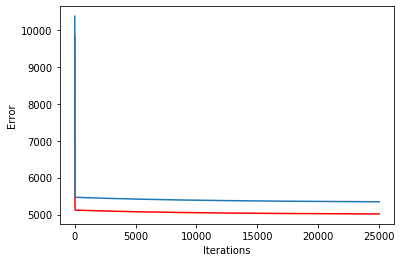

In [467]:

plt.xlabel('Appliance Energy consumption')
plt.ylabel('Residuals')
plt.plot(Cost_history, color = 'red')
plt.plot(test_cost_history)


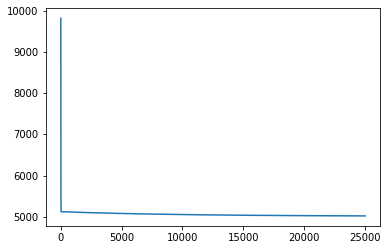

In [270]:

from matplotlib import pyplot as plt

plt.plot(Cost_history)
plt.show()

In [333]:
# Make predictions of y with optimum thetas
activation = 0
data_matrix = x_test_numpy
y_matrix = y_test_numpy
theta_matrix = optimum_thetas

#cost_function(activation,data_matrix,,y_matrix)

In [334]:
y_pred = predicted_value(data_matrix,theta_matrix)
test_error = 


array([[117.88473735],
       [176.37433329],
       [ 69.74482221],
       ...,
       [ 67.65566802],
       [ 86.73620085],
       [ 74.08020425]])

In [ ]:
#.......................Test Cases...................................
# Following are few test cases which have been calculated manually by hand or have been procured from internet. 
# These test cases alongwith the gradient check make the gradient descent algorithm solid. 

In [536]:
# This is a test case for cost calculation 
# The answer should be 11.9450
x_test = np.array([1,2,1,3,1,4,1,5])
x_test=x_test.reshape(4,2)
y_t = np.array([7,6,5,4])
y_t=y_t.reshape(4,1)
theta_test = np.array([0.1,0.2])
theta_test=theta_test.reshape(2,1)

cost_function(0,x_test,theta_test,y_t)

array([[11.945]])

In [ ]:
# Test case with non-zero thetas
x_test = np.array([2,1,3,7,1,9,1,8,1,3,7,4])
x_test=x_test.reshape(4,3)

y_t = np.array([2,5,5,6])
y_t=y_t.reshape(4,1)

theta_test = np.array([0.1,-0.2,0.3])
theta_test=theta_test.reshape(3,1)


alpha = 0.01
m =  x_test.shape[0]
maximum_iterations = 10
activation = 0

#optimum_thetas,Cost_history= wrapper_function(activation,alpha,maximum_iterations,data_matrix,y_matrix,thetas_matrix)

gradient_test_thetas,Cost_history,gradient_diff_sum_array,test_cost_history= wrapper_function(activation,alpha,maximum_iterations,data_matrix,y_matrix,thetas_matrix,x_test_matrix,y_test_matrix,convergence_threshold)
optimum_thetas,Cost_history